In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

#### Load in required datasets

In [13]:
#### FINAL
## counts
fnl_mn_large = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_large_cities_core_counts.csv')
fnl_mn_med = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_medium_cities_core_counts.csv')
fnl_mn_sml = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_small_cities_core_counts.csv')

## rates
fnl_mn_large_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_large_cities_core_rates.csv')
fnl_mn_med_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_medium_cities_core_rates.csv')
fnl_mn_sml_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_small_cities_core_rates.csv')



#### DEMEANED
## counts
fnl_large_core_counts_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_large_cities_core_counts_dm.csv')
fnl_medium_core_counts_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_medium_cities_core_counts_dm.csv')
fnl_small_core_counts_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_small_cities_core_counts_dm.csv')

## rates
fnl_large_core_rates_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_large_cities_core_rates_dm.csv')
fnl_medium_core_rates_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_medium_cities_core_rates_dm.csv')
fnl_small_core_rates_dm = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_core_dm/final_main_small_cities_core_rates_dm.csv')

#### Function for OLS of rate vars

#### 1 dep var - 1 ind var

In [13]:
def ols_multiple_ind_vars_seq(req_dfs, dep_var, ind_vars, dataset_names):
    for ind_var in ind_vars:
        count=0
        for df in req_dfs:
            model = sm.OLS.from_formula(f'{dep_var} ~ {ind_var}', data=df)
            results = model.fit()
            print(dataset_names[count])
            print(results.summary())

            count += 1

                            OLS Regression Results                            
Dep. Variable:       dm_violent_crime   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     3525.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:06:30   Log-Likelihood:                -82908.
No. Observations:                9120   AIC:                         1.658e+05
Df Residuals:                    9118   BIC:                         1.658e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.576e-14     22.48

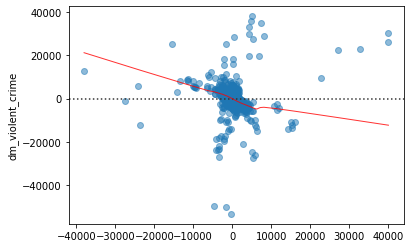

In [15]:
model = sm.OLS.from_formula('dm_violent_crime ~ dm_total_officers', data=fnl_large_core_counts_dm)
results = model.fit()
print(results.summary())

## plot residuals vs fitted to check for model validity ##

# fitted values coz need a constant term for intercept
model_fitted_y = results.fittedvalues

# model residuals
model_residuals = results.resid

# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal

# absolute residuals
model_abs_resid = np.abs(model_residuals)

sns.residplot(model_fitted_y, 'dm_violent_crime', data=fnl_large_core_counts_dm, lowess=True,
             scatter_kws={'alpha': 0.5},
             line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

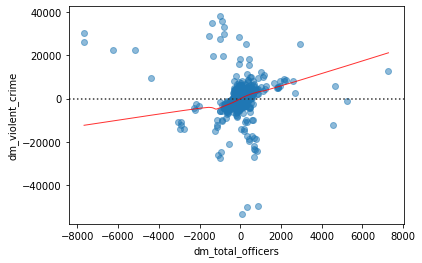

In [16]:
sns.residplot('dm_total_officers', 'dm_violent_crime', data=fnl_large_core_counts_dm, lowess=True,
             scatter_kws={'alpha': 0.5},
             line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

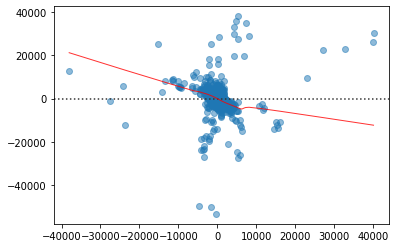

In [17]:
sns.residplot(model_fitted_y, model_residuals, data=fnl_large_core_counts_dm, lowess=True,
             scatter_kws={'alpha': 0.5},
             line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

In [14]:
ols_multiple_ind_vars_seq(req_dfs = [fnl_large_core_counts_dm, fnl_medium_core_counts_dm, fnl_small_core_counts_dm],
                         dataset_names=['Large Counts - Demeaned', 'Medium Counts - Demeaned', 'Small  Counts - Demeaned'],
                          dep_var='dm_violent_crime',
                         ind_vars = ['dm_total_officers','dm_prison_occupancy_count', 'dm_jail_occupancy_count',
                                     'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index'])

Large Counts - Demeaned
                            OLS Regression Results                            
Dep. Variable:       dm_violent_crime   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     3525.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:55:11   Log-Likelihood:                -82908.
No. Observations:                9120   AIC:                         1.658e+05
Df Residuals:                    9118   BIC:                         1.658e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept     

Medium Counts - Demeaned
                            OLS Regression Results                            
Dep. Variable:       dm_violent_crime   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     227.3
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           5.45e-51
Time:                        22:55:11   Log-Likelihood:                -95477.
No. Observations:               15187   AIC:                         1.910e+05
Df Residuals:                   15185   BIC:                         1.910e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept

In [61]:
def ols_multiple_data_multiple_ind_vars(req_dfs, dataset_names, dep_vars, ind_vars, counts=False):
    df_count = 0
    
    if counts == False:
        #sns.set(font_scale=1.8)

        fig, axs = plt.subplots(nrows=len(req_dfs)*(len(ind_vars[1])), ncols=1, figsize=(8, 60))
        fig.subplots_adjust(hspace=0.5)

        row_count = 0
    
    for df in req_dfs:
        for ind_var in ind_vars[df_count]:
            if counts:
                model = sm.GLM.from_formula(f'{dep_vars[df_count]} ~ {ind_var}', data = fnl_mn_large, family=sm.families.NegativeBinomial())
            
            else:
                model = sm.OLS.from_formula(f'{dep_vars[df_count]} ~ {ind_var}', data=df)
            results = model.fit()
            print(dataset_names[df_count])
            print(results.summary(), '\n', '\n')           
                        
            ## plot residuals vs fitted to check for model validity ##  
            if counts == False:
                sns.residplot(results.fittedvalues, results.resid, data=df, lowess=True,
                 scatter_kws={'alpha': 0.5},
                 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
                             ax=axs[row_count])

                axs[row_count].set_title(f'{dataset_names[df_count]}_{dep_vars[df_count]}_{ind_var} residuals vs fitted', fontsize=14)
                print('row_count: ', row_count)
                row_count += 1
                
        df_count += 1

#### Final Counts

In [49]:
fnl_dep_var = 'violent_crime'
fnl_ind_vars = ['total_officers', 'prison_occupancy_count', 'jail_occupancy_count', 'drug_tot_arrests', 'disorder_arrests_tot_index']

ols_multiple_data_multiple_ind_vars(req_dfs = [fnl_mn_large, fnl_mn_med, fnl_mn_sml],
                          dep_vars = [fnl_dep_var, fnl_dep_var, fnl_dep_var],
                          ind_vars = [fnl_ind_vars, fnl_ind_vars, fnl_ind_vars],
                          dataset_names=['fnl_mn_large', 'fnl_mn_med', 'fnl_mn_sml'],
                                   counts=True,
                                   weights)

fnl_mn_large
                 Generalized Linear Model Regression Results                  
Dep. Variable:          violent_crime   No. Observations:                 9120
Model:                            GLM   Df Residuals:                     9118
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -75591.
Date:                Tue, 31 Mar 2020   Deviance:                       7910.7
Time:                        23:51:00   Pearson chi2:                 7.07e+03
No. Iterations:                    90                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.7196      

fnl_mn_med
                 Generalized Linear Model Regression Results                  
Dep. Variable:          violent_crime   No. Observations:                 8306
Model:                            GLM   Df Residuals:                     8304
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68208.
Date:                Tue, 31 Mar 2020   Deviance:                       6356.0
Time:                        23:51:00   Pearson chi2:                 6.72e+03
No. Iterations:                    56                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept        

fnl_mn_sml
                 Generalized Linear Model Regression Results                  
Dep. Variable:          violent_crime   No. Observations:                 8100
Model:                            GLM   Df Residuals:                     8098
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67701.
Date:                Tue, 31 Mar 2020   Deviance:                       8371.5
Time:                        23:51:01   Pearson chi2:                 1.29e+04
No. Iterations:                    41                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept

#### Demeaned Counts

fnl_large_core_counts_dm
                            OLS Regression Results                            
Dep. Variable:       dm_violent_crime   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     3525.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:39:53   Log-Likelihood:                -82908.
No. Observations:                9120   AIC:                         1.658e+05
Df Residuals:                    9118   BIC:                         1.658e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept    

row_count:  4
fnl_medium_core_counts_dm
                            OLS Regression Results                            
Dep. Variable:       dm_violent_crime   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     50.48
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           1.26e-12
Time:                        09:40:12   Log-Likelihood:                -95565.
No. Observations:               15187   AIC:                         1.911e+05
Df Residuals:                   15185   BIC:                         1.911e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

row_count:  9
fnl_small_core_counts_dm
                            OLS Regression Results                            
Dep. Variable:       dm_violent_crime   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     19.61
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           9.53e-06
Time:                        09:40:48   Log-Likelihood:            -4.4543e+05
No. Observations:               86074   AIC:                         8.909e+05
Df Residuals:                   86072   BIC:                         8.909e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

row_count:  14


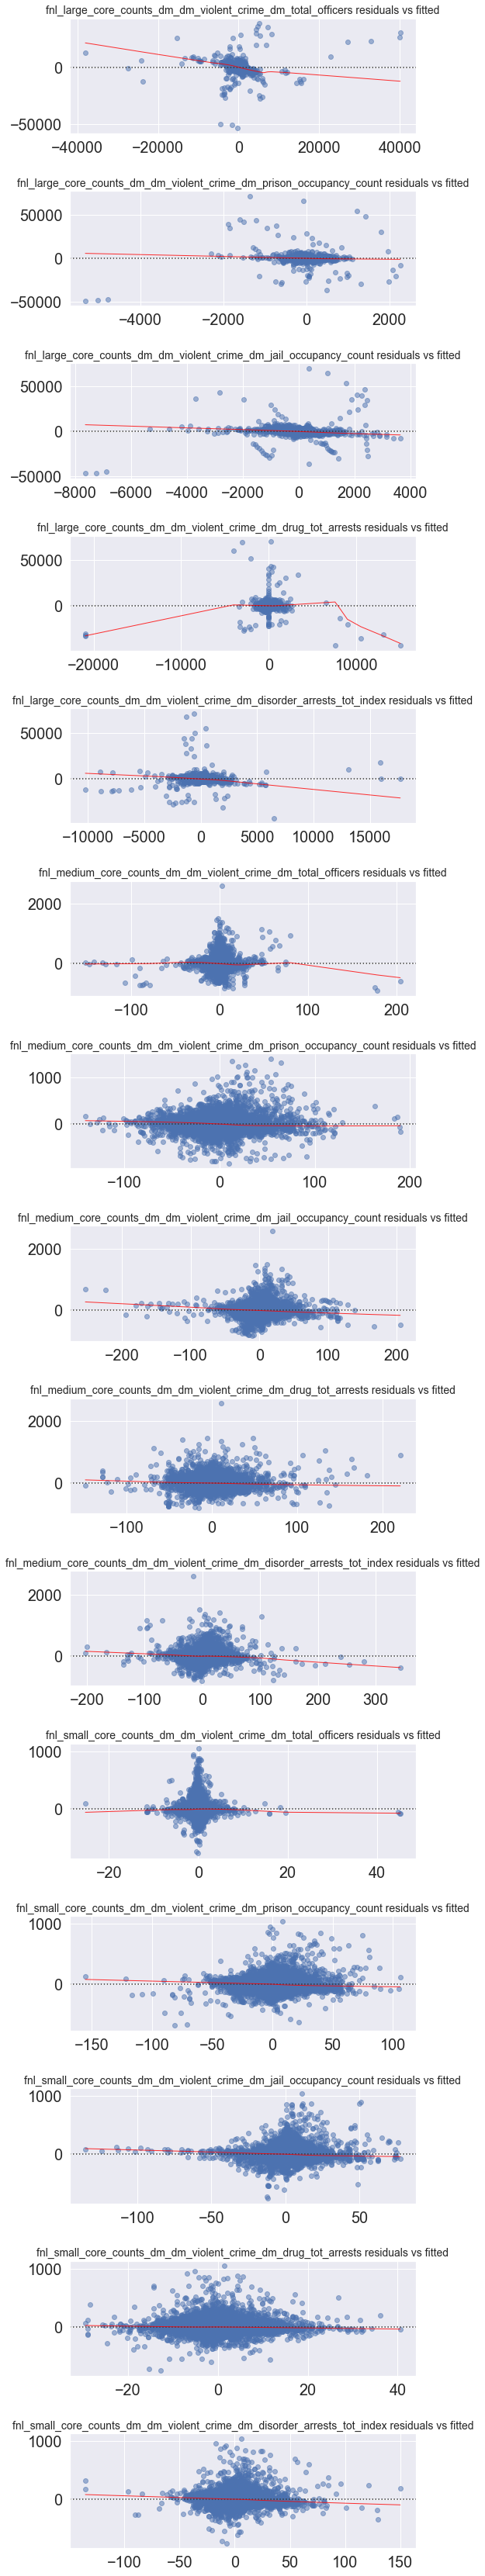

In [62]:
dm_dep_var = 'dm_violent_crime'
dm_ind_vars = ['dm_total_officers', 'dm_prison_occupancy_count', 'dm_jail_occupancy_count', 'dm_drug_tot_arrests', 'dm_disorder_arrests_tot_index']

ols_multiple_data_multiple_ind_vars(req_dfs = [fnl_large_core_counts_dm, fnl_medium_core_counts_dm, fnl_small_core_counts_dm],
                          dep_vars = [dm_dep_var, dm_dep_var, dm_dep_var],
                          ind_vars = [dm_ind_vars, dm_ind_vars, dm_ind_vars],
                          dataset_names=['fnl_large_core_counts_dm', 'fnl_medium_core_counts_dm', 'fnl_small_core_counts_dm'])

#### Rates

In [48]:
dm_dep_var = 'dm_violent_crime_rate'
dm_ind_vars = ['dm_total_officers_rate', 'dm_prison_occupancy_count_rate', 'dm_jail_occupancy_count_rate',
               'dm_drug_tot_arrests_rate', 'dm_disorder_arrests_tot_index_rate']

fnl_dep_var = 'violent_crime_rate'
fnl_ind_vars = ['total_officers_rate', 'prison_occupancy_count_rate', 'jail_occupancy_count_rate',
                'drug_tot_arrests_rate', 'disorder_arrests_tot_index_rate']

ols_multiple_data_multiple_ind_vars(req_dfs = [fnl_large_core_rates_dm, fnl_medium_core_rates_dm, fnl_small_core_rates_dm,
                                              fnl_mn_large_rates, fnl_mn_med_rates, fnl_mn_sml_rates],
                          dep_vars = [dm_dep_var, dm_dep_var, dm_dep_var, fnl_dep_var, fnl_dep_var, fnl_dep_var],
                          ind_vars = [dm_ind_vars, dm_ind_vars, dm_ind_vars, fnl_ind_vars, fnl_ind_vars, fnl_ind_vars],
                          dataset_names=['fnl_large_core_rates_dm', 'fnl_medium_core_rates_dm', 'fnl_small_core_rates_dm',
                                       'fnl_mn_large_rates', 'fnl_mn_med_rates', 'fnl_mn_sml_rates'])

fnl_large_core_rates_dm
                              OLS Regression Results                             
Dep. Variable:     dm_violent_crime_rate   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     14.43
Date:                   Tue, 31 Mar 2020   Prob (F-statistic):           0.000147
Time:                           00:05:12   Log-Likelihood:                -62989.
No. Observations:                   9120   AIC:                         1.260e+05
Df Residuals:                       9118   BIC:                         1.260e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

fnl_small_core_rates_dm
                              OLS Regression Results                             
Dep. Variable:     dm_violent_crime_rate   R-squared:                       0.025
Model:                               OLS   Adj. R-squared:                  0.025
Method:                    Least Squares   F-statistic:                     1894.
Date:                   Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                           00:05:12   Log-Likelihood:            -4.9399e+05
No. Observations:                  74616   AIC:                         9.880e+05
Df Residuals:                      74614   BIC:                         9.880e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

fnl_mn_med_rates
                            OLS Regression Results                            
Dep. Variable:     violent_crime_rate   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     7525.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:05:12   Log-Likelihood:                -95482.
No. Observations:               13197   AIC:                         1.910e+05
Df Residuals:                   13195   BIC:                         1.910e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
I

                            OLS Regression Results                            
Dep. Variable:     violent_crime_rate   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:05:13   Log-Likelihood:            -5.8217e+05
No. Observations:               80449   AIC:                         1.164e+06
Df Residuals:                   80447   BIC:                         1.164e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 